##  Important Rules
**Insert team member names here:**

**Rename this notebook with your MIDAS username as the prefix**

**Choose "Restart Kernel and Run All Cells ..." under "Kernel" before submitting your final notebook**


**Report your Pareto Score: Nov 25**

**Due date of final: December 3rd, 11:59pm**

## Final Project - Fine-tuning and Transfer Learning on Caltech-101 with Model Size and Accuracy Trade-offs

The goal of this project is to classify images from the Caltech-101 dataset using fine-tuning and transfer learning while exploring the trade-offs between accuracy and model size. The dataset includes images from 101 categories, making it a moderately challenging classification task. Given the relatively small dataset size, we will leverage pretrained CNNs for feature extraction, comparing their performance in terms of both accuracy and model size.

### Key Steps:
#### Data Preprocessing:

The Caltech-101 images will be resized, normalized, and split into training, validation, and test sets. Data augmentation techniques may be applied to mitigate overfitting.

#### Transfer Learning:
Three different pretrained models with varying sizes and complexities need to be used: each team can choose which three

For each model, the convolutional layers will be frozen to use their pretrained features, and only the top fully connected layers will be fine-tuned for the Caltech-101 task. For transfer learning, all weights should be trained.

#### Model Training:
The models will be trained using the Caltech-101 dataset.
Techniques such as learning rate scheduling, early stopping, and data augmentation can be applied.
Each model’s training time, accuracy, and memory usage will be monitored to analyze the trade-offs.

#### Trade-off Analysis:
Using the same test dataset, the final accuracy should be computed. Each team should use the same routine to fine-tune and transfer learning three different models. And compare the accuracy vs model sizes. The teams with overall Pareto trade-off will get extra credit.

### Details
1. Implement dataloaders for train (70%), validation (15%) and testing (15%) of caltech101 
2. Implement visualization routines to show image, ground truth and predicted labels       
3. Implement fine-tuning routine, using pretrained weights from Pytorch                    
4. Implement transfer learning routine, using pretrained weights                           
5. Use hyperparameter tuning to achieve good accuracy, using validation datasets           
6. GPU must be used                                                                        
7. Conduct experiment at least *3 (three) * pretrained models.                          
8. (Extra credit) The top 3 teams with best accuracy-model size Pareto scores (<0.088) get extra credit

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.transforms import v2
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import math
from torch.utils.data import DataLoader, random_split

import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy
import os

**This is important: you want to use the common normalization vector from imageNet. Since pretrained weights are based on ImageNet**

In [2]:
imagenet_mean=[0.485, 0.456, 0.406]
imagenet_std=[0.229, 0.224, 0.225]

In [3]:
## routine to print stats of a model
def print_model_weight_stats(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    frozen_params = total_params - trainable_params

    print("{}: Number of fronzen param = {:,d}, number of trainable param = {:,}".format(type(model),frozen_params, trainable_params))

## calculate the pareto value
def compute_pareto_value(acc, msize):
    ## accuracy must be between 0.0 and 0.9999
    ## model size should be in millions, between 1.0 and 900!
    if not ( 0.0 <= acc <= 0.9999):
        raise ValueError ("acc range must be between 0.0 and 0.9999")

    if not (1.0 <= msize <= 900):
        raise ValueError("model sizse must be in millions, between 1.0M and 900M")

    xdist = 0.99 - acc
    ydist = math.log10( np.float64(msize) )

    # assumption: range of accuracy is between 0.99 to 0.80 -> delta 0.2
    # range of model is from 1M to 100M -> delta 2 after taking log
    # hence scale model by 0.1
    ydist = 0.1*ydist

    z_score = math.sqrt( xdist*xdist + ydist*ydist)
    return (z_score)

## use GPU if available
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [4]:
## routines

## Your code here

In [5]:
## code here

## your code here


In [6]:
## thhis is very restrictive, but works
## your code

In [7]:
## now do some work
## example: dataset = datasets.Caltech101(root='./data', download=True, transform=transform)

Files already downloaded and verified


In [8]:
val_size = int(0.15 * len(dataset))
test_size = val_size
train_size = len(dataset) - val_size - test_size

In [10]:
len(train_dataset)

6075

In [11]:
len(val_dataset)

1301

In [12]:
len(test_dataset)

1301

In [13]:
## data loader
## Your code here.

#### Fine tuning, use ResNet18

In [14]:
## Your code

<class 'torchvision.models.resnet.ResNet'>: Number of fronzen param = 0, number of trainable param = 11,689,512


In [15]:
## Your code

<class 'torchvision.models.resnet.ResNet'>: Number of fronzen param = 11,176,512, number of trainable param = 51,813


In [19]:
## testing loss
run_test_dataset(model18f, test_loader)

Test loss = 0.6155, acc = 0.8870


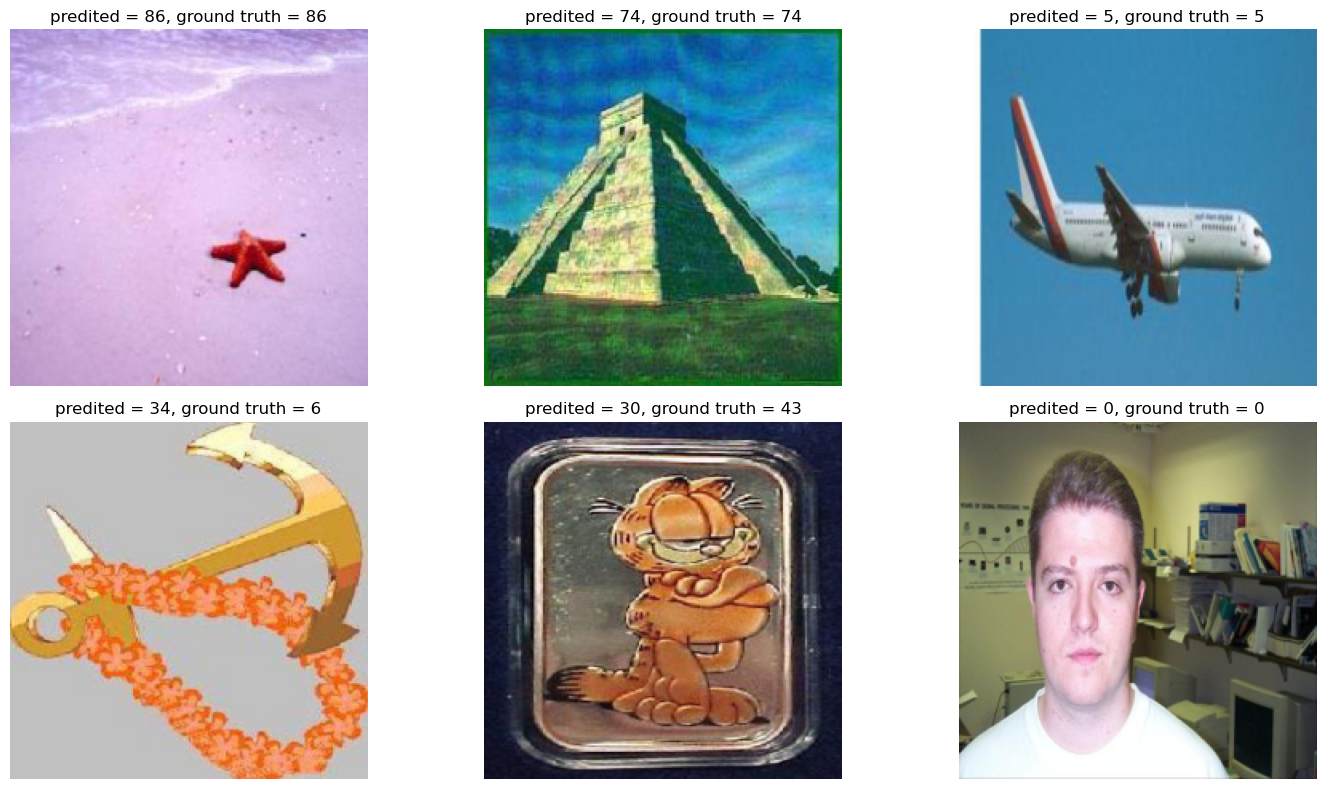

In [20]:
## do a quick plot
## inputs, labels = next(iter(test_loader))
## your code

In [21]:
## ResNet18, transfer learning
## code

<class 'torchvision.models.resnet.ResNet'>: Number of fronzen param = 0, number of trainable param = 11,228,325


In [24]:
## testing loss
run_test_dataset(model18t, test_loader)

Test loss = 0.2726, acc = 0.9316


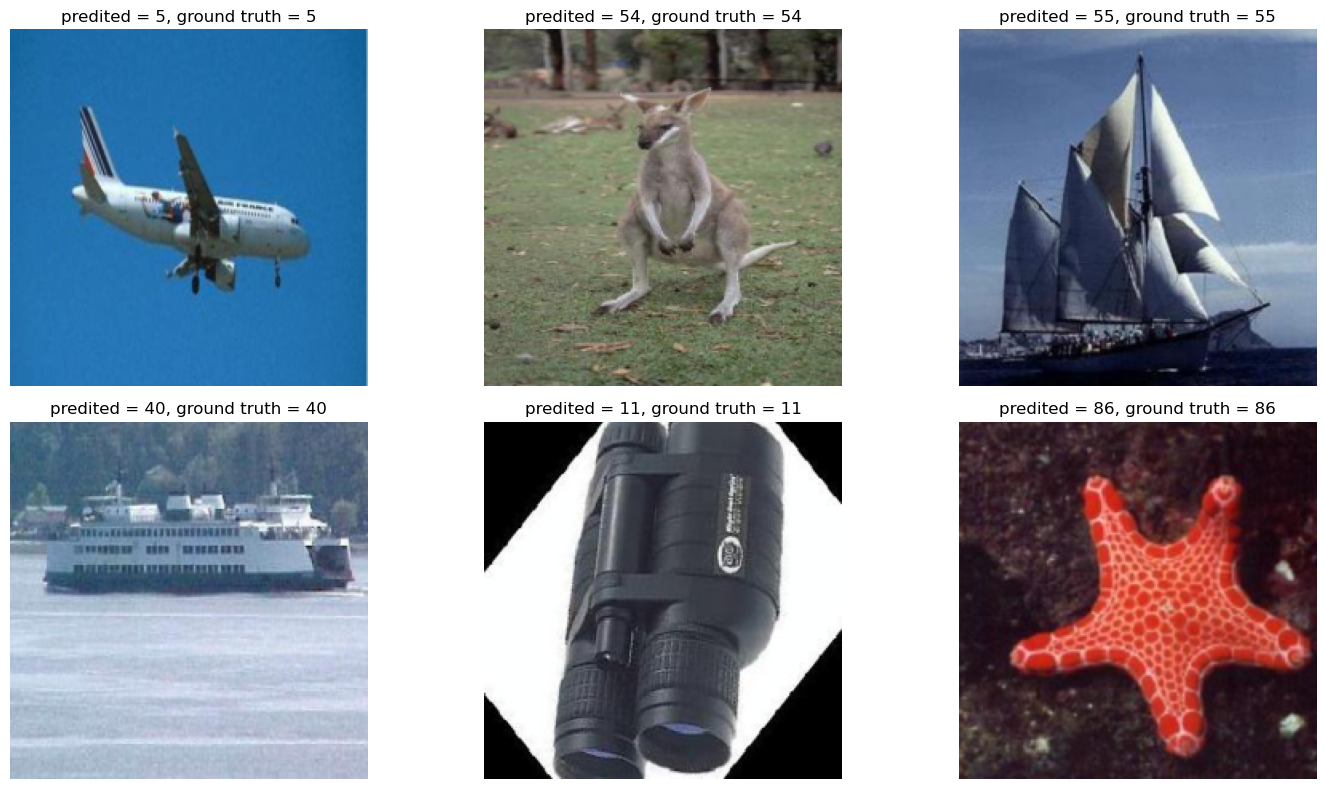

In [25]:
## do a quick plot
## Your code

#### ShuffleNet


In [26]:
## fine tuning shuffle Net
## repeat

In [30]:
## testing loss
run_test_dataset(modelsnf, test_loader)

Test loss = 2.9775, acc = 0.3851


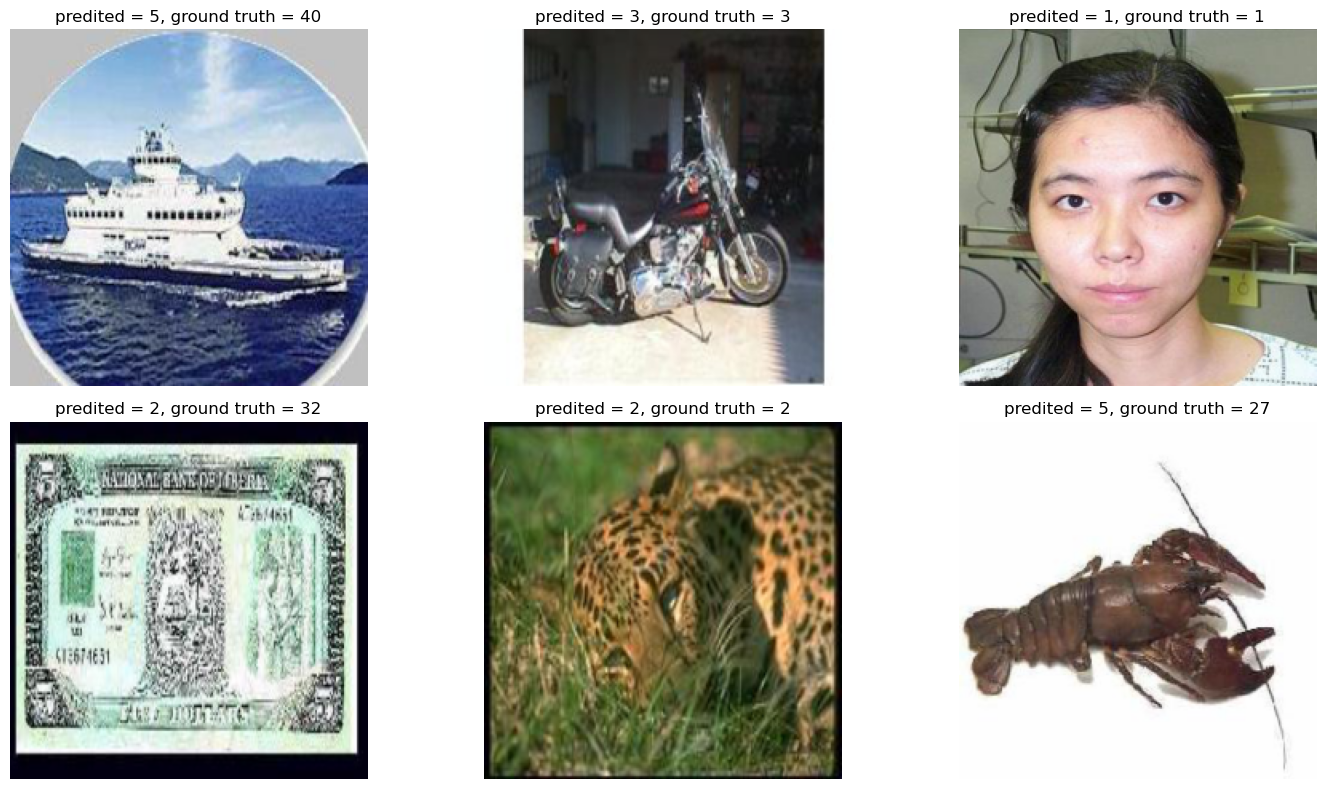

In [31]:
## do a quick plot
## your code

In [32]:
## transfer learning of shuffleNet
## 

<class 'torchvision.models.shufflenetv2.ShuffleNetV2'>: Number of fronzen param = 0, number of trainable param = 1,357,129


In [35]:
## testing loss
run_test_dataset(modelsnt, test_loader)

Test loss = 0.2890, acc = 0.9170


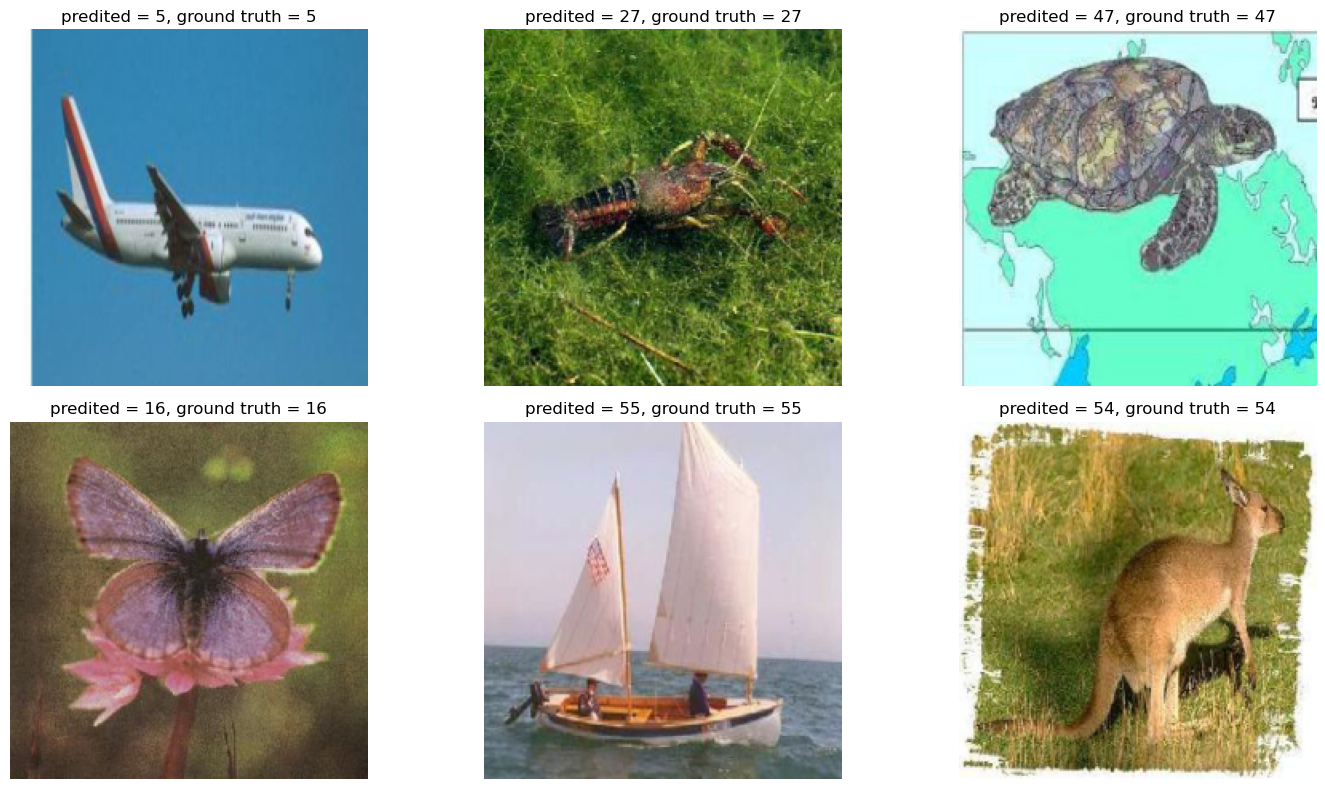

In [36]:
## do a quick plot
## your code

#### You have to implement the third model

In [37]:
## add lots of code here

#### Report the Pareto value here

In [38]:
## for ResNet18, testing accuracy is for transfer learning
acc = 0.9347

## the model size is copied from print command
msize = 11228325.0/1000000

In [39]:
print("ResNet Pareto score is {:.4f}".format( compute_pareto_value(acc, msize)))

ResNet Pareto score is 0.1187


In [40]:
## for shufflenet
acc = 0.9032
msize = 1357129.0/1000000

In [41]:
print("ShuffleNet pareto score is {:.4f}".format( compute_pareto_value(acc, msize)))

ShuffleNet pareto score is 0.0878
